In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/data.csv', encoding = "utf-8")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [ ]:
#Total Transaksi
df['InvoiceNo'].nunique()

25900

In [ ]:
#10 Produk Terlaris dibeli pelanggan
terlaris = df['Description'].value_counts().head(10)

In [ ]:
terlaris

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

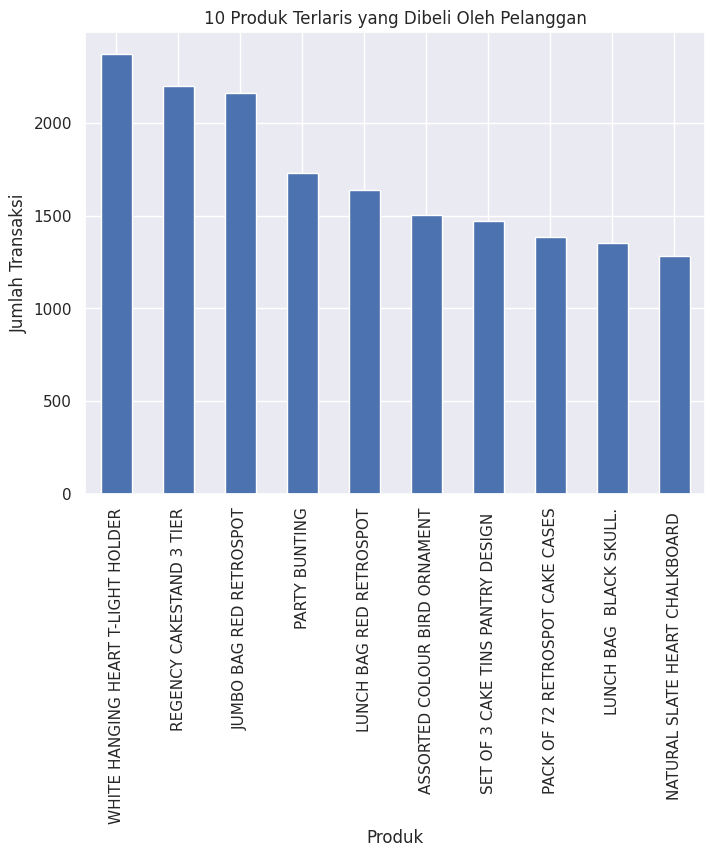

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')
terlaris.plot(kind='bar')
plt.title('10 Produk Terlaris yang Dibeli Oleh Pelanggan')
plt.xlabel('Produk')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [ ]:
#5 Produk yang Paling Jarang Dibeli Oleh Pelanggan
jarang_dibeli = df['StockCode'].value_counts().tail(5)

In [ ]:
jarang_dibeli

StockCode
21431     1
22275     1
17001     1
90187A    1
72759     1
Name: count, dtype: int64

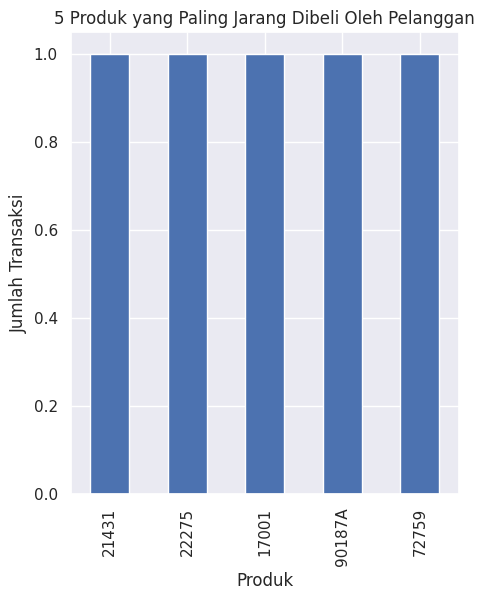

In [ ]:
plt.figure(figsize=(5, 6))
sns.set(style='darkgrid')
jarang_dibeli.plot(kind='bar')
plt.title('5 Produk yang Paling Jarang Dibeli Oleh Pelanggan')
plt.xlabel('Produk')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [ ]:
#Tentukan urutan di Tanggal, Bulan dan Tahun berapa produk paling laris dibeli
pd_terlaris = df['Description'].value_counts().head(10).index.tolist()
df_pd_terlaris = df[df['Description'].isin(pd_terlaris)]
penjualan_tgl = df_pd_terlaris.groupby([df['InvoiceDate'].dt.date, 'Description']).size().reset_index(name='Jumlah')
terbanyak_tgl = penjualan_tgl.loc[penjualan_tgl.groupby('Description')['Jumlah'].idxmax()]

In [ ]:
tgl_produk_terlaris = []
for index, row in terbanyak_tgl.iterrows():
    tgl_produk_terlaris.append((row['Description'], row['InvoiceDate'].strftime('%Y-%m-%d'), row['Jumlah']))

In [ ]:
tgl_produk_terlaris

[('ASSORTED COLOUR BIRD ORNAMENT', '2011-10-30', 16),
 ('JUMBO BAG RED RETROSPOT', '2011-05-10', 25),
 ('LUNCH BAG  BLACK SKULL.', '2011-11-24', 13),
 ('LUNCH BAG RED RETROSPOT', '2011-08-11', 15),
 ('NATURAL SLATE HEART CHALKBOARD ', '2011-01-25', 11),
 ('PACK OF 72 RETROSPOT CAKE CASES', '2011-04-04', 13),
 ('PARTY BUNTING', '2011-05-10', 20),
 ('REGENCY CAKESTAND 3 TIER', '2011-04-04', 18),
 ('SET OF 3 CAKE TINS PANTRY DESIGN ', '2010-12-17', 14),
 ('WHITE HANGING HEART T-LIGHT HOLDER', '2011-04-18', 24)]

<function matplotlib.pyplot.show(close=None, block=None)>

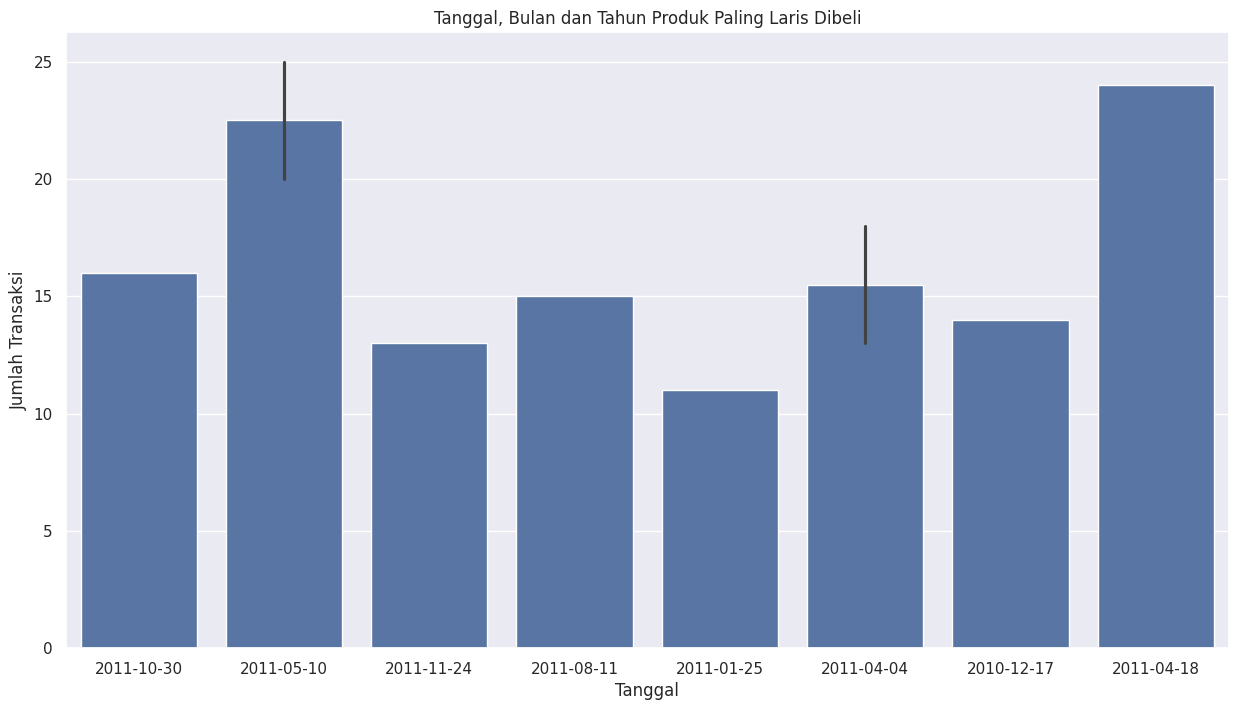

In [ ]:
plt.figure(figsize=(15, 8))
sns.set(style='darkgrid')
sns.barplot(x=terbanyak_tgl['InvoiceDate'], y='Jumlah', data=terbanyak_tgl)
plt.title('Tanggal, Bulan dan Tahun Produk Paling Laris Dibeli')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.show